# Echilibre pentru ecuații diferențiale și sisteme discrete

Cînd studiem sistemele dinamice un aspect deosebit de important este existența și comportamentul **punctelor de echilibru.** Pentru o ecuație diferențială $X'=f(X)$, punctele de echilibru sînt punctele $X_0$ pentru care $f(X_0)=0$. 

Pînă acum am studiat ecuațiile diferențiale folosind metoda Euler pentru simulări numerice, dar acest lucru are mari limitări. Fie ecuația 
$$
x'=r\left(1-\frac{x}{k}\right)\left(\frac{x}{a}-1\right)
$$
foarte asemănătoare cu ecuația logistică. Să simulăm comportamentul ei pentru cîteva valori ale parametrilor și ale valorii inițiale $x(0).$ Anume luăm $r=0.1,a=5,k=100$ și valorile inițiale $10,20,150$, respectiv $4$.

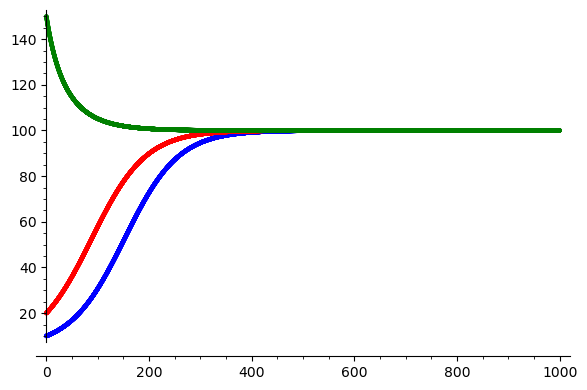

In [1]:
x=var('x')
r=0.1;a=5;k=100
f=r*(1-x/k)*(x/a-1)

sol1=desolve_odeint(f,[10],srange(0,1000,0.1),[x])
ts=list(map(lambda t:t/10, range(0,len(sol1)-1)))
vec1=list(zip(ts,list(sol1[:,0])))
p1=points(vec1)
sol2=desolve_odeint(f,[20],srange(0,1000,0.1),[x])
vec2=list(zip(ts,list(sol2[:,0])))
p2=points(vec2,color='red')
sol3=desolve_odeint(f,[150],srange(0,1000,0.1),[x])
vec3=list(zip(ts,list(sol3[:,0])))
p3=points(vec3,color='green')
(p1+p2+p3).show()

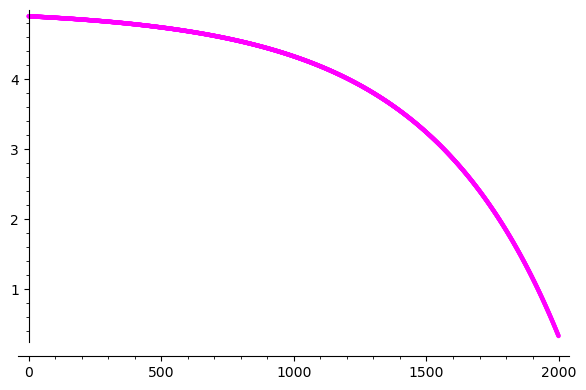

In [6]:
x=var('x')
r=0.1;a=5;k=100
f=r*(1-x/k)*(x/a-1)
sol4=desolve_odeint(f,[4.9],srange(0,200,0.1),x)
vec4=list(zip(range(0,len(sol4)-1),list(sol4[:,0])))
p4=points(vec4,color='magenta')
(p4).show()

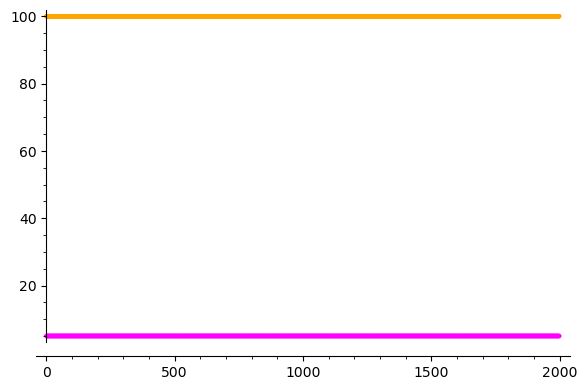

In [7]:
x=var('x')
r=0.1;a=5;k=100
f=r*(1-x/k)*(x/a-1)
sol5=desolve_odeint(f,[a],srange(0,200,0.1),x)
vec5=list(zip(range(0,len(sol5)-1),list(sol5[:,0])))
p5=points(vec5,color='magenta')
sol6=desolve_odeint(f,[k],srange(0,200,0.1),x)
vec6=list(zip(range(0,len(sol6)-1),list(sol6[:,0])))
p6=points(vec6,color='orange')
(p5+p6).show()

Se vede că în primele trei cazuri, comportarea este asemănătoare cu cea a ecuației logistice: dacă pornim cu o valoare mai mică decît $k$, atunci soluția va crește către el, iar dacă pornim cu o valoare mai mare, soluția va scădea către $k$. În cazul al patrulea se întimplă ceva diferit, soluția nu crește cum ne-am aștepta ci scade. 

Comportamentul nou provine din faptul că am luat $x(0)$ mai mică decît $a$ în acest caz, în vreme ce în primele trei cazuri ele au fost toate mai mari decît $a$.

Cum nu putem simula pentru toate valorile inițiale este important să găsim o metodă să determinăm comportamentul soluțiilor. în cazul dimensiunii $1$, o astfel de metodă există. Pentru cazul multi-dimensional această metodă oferă informații importante, chiar dacă nu complete. 

Primul pas constă în a determina punctele în care sistemul nu se schimbă, numite **punctele de echilibru**. Aceast sînt puncte pentru care $x'=0$ (deoarece am văzut că derivata unei constante este $0$, și reciproc doar funcțiile constante au această proprietate). Practic pentru ecuația $x'=f(x)$, trebuie să găsim valorile lui $x$ pentru care $f(x)=0$. De exemplu pentru ecuația noastră punctele de echilibru satisfac
$$
\begin{aligned}
1-\frac{x}{k}=0 & \Longrightarrow & x=k \text{ și } \\
1-\frac{x}{a}=0 & \Longrightarrow & x=a. 
\end{aligned}
$$


## Stabilitatea echilibrelor - Metoda punctului intermediar

După ce am determinat punctele de echilibru este important să decidem ce se întimplă în jurul acestui punct: dacă pornim din apropierea echilibrului răminem în apropiere sau ne îndepărtăm? De asemenea soluțiile care pornesc dintr-un punct oarecare se apropie de una dintre soluțiile constante? 

Matematic vorbim de **stabilitatea** echilibrelor. Un echilbru este stabil dacă pornind din apropierea lui rămînem în apropiere și este instabil dacă pornind din apropierea echilibrului ne îndepărtăm.

Pentru a studia stabilitatea unui echilibru trebuie să vedem semnul funcției $f$. Să luăm ca exemplu ecuația logistică 
$$
x'=rx\left(1-\frac{x}{k}\right).
$$
Punctele sale de echibru sînt $x_0=0$ și $x_1=k>0$. Pentru valori ale lui $x$ între $0$ și $k$ $f(x) > 0,$ iar pentru $x > k,$
$f(x) < 0$. Din desen devine imediată stabilitatea: dacă vectorii indepărtează punctul de punctul de echilibru, atunci acesta este instabil, iar dacă îl apropie este stabil.

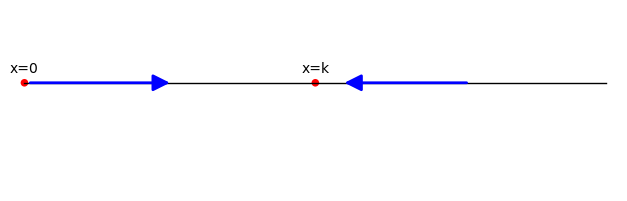

In [3]:
p1=plot(1,(0,10),color='black',axes=False)
p2=point((0,1),size=30,color='red')
p3=text('x=0',(0,1.2),color='black')
p4=point((5,1),size=30,color='red')
p5=text('x=k',(5,1.2),color='black')
p6=arrow((0.1,1),(2.5,1))
p7=arrow((7.6,1),(5.5,1))
(p1+p2+p3+p4+p5+p6+p7).show(aspect_ratio=1.2,ymin=-0.5,ymax=2)

Nu este întotdeauna la fel de ușor ca în cazul ecuației logistice să determinăm semnul funcției care definește ecuația diferențială. Să luăm următoarea ecuație, bazată pe modelul logistic, unde o parte din populație este scoasă spre exemplu prin vînătoare sau pescuit:
$$
x'=0,2 x\left(1-\frac{x}{1000}\right)-0,1x.
$$
Se poate cu ușurință vedea că cele două echilibre sînt $x=0$ și $x=500$. Pentru a găsi semnul lui $x'$ pe fiecare interval $(0,500)$, respectiv $(500,\infty)$ este suficient să luăm cîte un punct în fiecare interval și să vedem semnul funcției în acest punct.  Astfel avem o figură similară cu cea precedentă. 

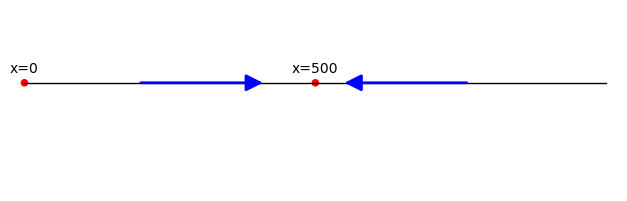

In [34]:
p1=plot(1,(0,10),color='black',axes=False)
p2=point((0,1),size=30,color='red')
p3=text('x=0',(0,1.2),color='black')
p4=point((5,1),size=30,color='red')
p5=text('x=500',(5,1.2),color='black')
p6=arrow((2,1),(4.1,1))
p7=arrow((7.6,1),(5.5,1))
(p1+p2+p3+p4+p5+p6+p7).show(aspect_ratio=1.2,ymin=-0.5,ymax=2)

Am folosit implicit faptul că o funcție continuă nu poate schimba semnul fără să treacă prin $0$. Aceasta este teorema valorii intermediare. Noi cunoaștem toate zerourile, funcția $x'$ nu poate schimba semnul fără să treacă prin echilibru.

## Stabilitatea echilibrelor: analiza liniară a stabilității

Metoda grafică are succes în dimensiune $1$, dar în dimensiune mai mare nu funcționează așa de bine. Studiem dinnou ecuația logistică 
$$
x'=x\left(1-\frac{x}{k}\right).
$$
Facem graficul funcției $f(x)=x\left(1-\frac{x}{k}\right)$ și vedem că punctele de echilibru sînt cele în care graficul taie axa $Ox$. Pentru $x=0$ funcția trece de la negativ la pozitiv, deci crește, iar pentru $x=k$ din contră trece de la pozitiv la negativ, decit scade. Prin urmare panta tangentei la grafic în primul echilibru este pozitivă, iar în cel de-al doilea panta este negativă.

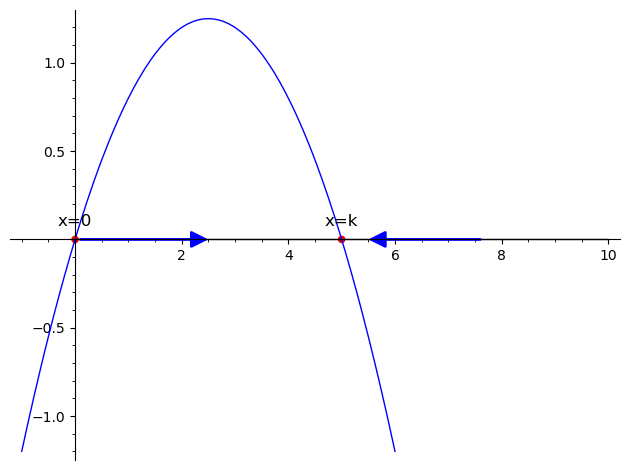

In [48]:
x=var('x')
k=5
f(x)=x*(1-x/k)
p1=plot(0,(0,10),color='black')
p2=point((0,0),size=30,color='red')
p3=text('x=0',(0,0.1),color='black',fontsize=12)
p4=point((5,0),size=30,color='red')
p5=text('x=k',(5,0.1),color='black',fontsize=12)
p6=arrow((0.1,0),(2.5,0))
p7=arrow((7.6,0),(5.5,0))
p8=plot(f,(-1,k+1))
(p8+p1+p2+p3+p4+p5+p6+p7).show()

Calculăm derivata funcției:
$$
f'(x)=1-\frac{2x}{k}.
$$
Deci $f'(0)=1 > 0$ și $f'(k)=-1 < 0$. Semnul derivatei ne indică stabilitatea unui echilibru $x^*$:
 - dacă $f'(x^*) > 0,$ atunci echilibrul este instabil;
 - dacă $f'(x^*) < 0,$ atunci echilibrul este stabil. 
 
 Aceasta este o primă aplicației a **teoremei Hartman-Grobman**: comportarea unei ecuații diferențiale în jurul unui punct de echilibru este determinată de aproximarea sa liniară. 

## Efectul Allee

În anumite populații s-a constat următorul fenomen destul de neintuitiv: pentru anumite populații supravițuirea nu are loc decît pentru un anumit număr minim de indivizi. Dacă numărul de indivizi scade sub un anumit prag, atunci populația intră în declin, putînd chiar dispărea. Acesta este *efectul Alle*.

Efectul Allee se modelează modificînd ecuația logistică într-o formă pe care am mai întilnit-o:
$$
x'=rx\left(1-\frac{x}{k}\right)\left(\frac{x}{a}-1\right).
$$

Avem trei puncte de echilibru, anume $x=0$, $x=k$ și $x=a$. Pentru a studia stabilitatea cu ajutorul metodei punctului intermediar luăm cîte un punct în intervalele $(0,a)$, $(a,k)$ și $(k,\infty)$ (am presupus $a < k$). 

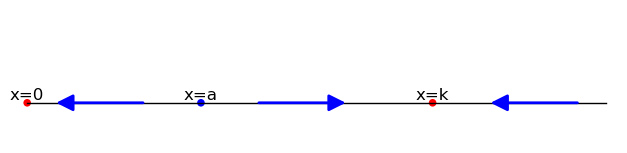

In [1]:
x=var('x')
k=7;a=3
f(x)=x*(1-x/k)*(x/a-1)
p1=plot(0,(0,10),color='black',axes=False)
p2=point((0,0),size=30,color='red')
p3=text('x=0',(0,0.1),color='black',fontsize=12)
p4=point((a,0),size=30,color='blue')
p5=text('x=a',(a,0.1),color='black',fontsize=12)
p8=point((k,0),size=30,color='red')
p9=text('x=k',(k,0.1),color='black',fontsize=12)
p6=arrow((2,0),(0.5,0))
p7=arrow((4,0),(5.5,0))
p10=arrow((9.5,0),(8,0))
(p1+p2+p3+p4+p5+p6+p7+p8+p9+p10).show(aspect_ratio=1.3,ymin=-0.5,ymax=1.2)

Să aplicăm acum și metoda analizei liniare. 

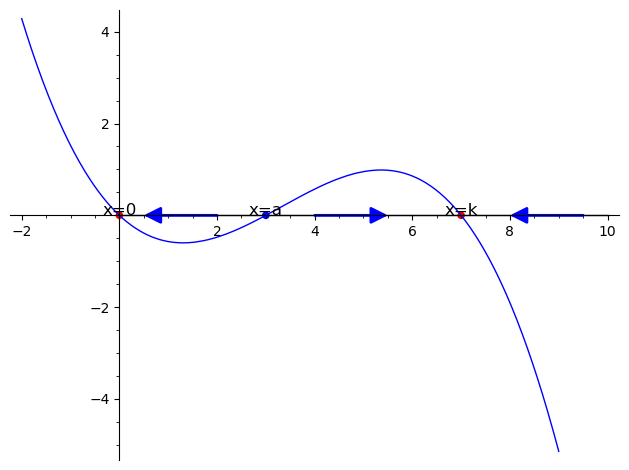

In [5]:
x=var('x')
k=7;a=3;r=1
f(x)=r*x*(1-x/k)*(x/a-1)
p1=plot(0,(0,10),color='black',axes=False)
p2=point((0,0),size=30,color='red')
p3=text('x=0',(0,0.1),color='black',fontsize=12)
p4=point((a,0),size=30,color='blue')
p5=text('x=a',(a,0.1),color='black',fontsize=12)
p8=point((k,0),size=30,color='red')
p9=text('x=k',(k,0.1),color='black',fontsize=12)
p6=arrow((2,0),(0.5,0))
p7=arrow((4,0),(5.5,0))
p10=arrow((9.5,0),(8,0))
p11=plot(f,(-2,9),axes=True)
(p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11).show()

Privind graficul vedem că echilibrul $x=0$ este stabil, $x=a$ este instabil și $x=k$ este iar stabil. Putem verifica acest lucru și prin calcule. Avem
$$
f(x)=-\frac{r}{ak}x^3+\frac{r}{a}x^2+\frac{r}{k}x^2-rx,
$$
deci
$$
f'(x)=-\frac{3r}{ak}x^2+\frac{2r}{a}x+\frac{2r}{k}x-r.
$$
Evaluăm acum derivata în punctele de echilibru:
$$
\begin{aligned}
\left.\frac{df}{dx}\right|_{x=0} & = & -r & < & 0 \\
\left.\frac{df}{dx}\right|_{x=a} & = & r\left(1-\frac{a}{k}\right) & > & 0 \\
\left.\frac{df}{dx}\right|_{x=k} & = & r\left(1-\frac{k}{a}\right) & < & 0 
\end{aligned}
$$
De aici rezultă stabilitatea echilibrelor.

## Modele de teoria jocurilor aplicată la teoria evoluției

Teoria jocurilor este folosită pentru a studia cum anumite gene au succes sau eșuează într-un anumit mediu. În funcție de mediu o anumită genă oferă un avantaj sau un dezavantaj. Fiecare genă poate fi interpretată ca o strategie (un pariu), iar condițiile de mediu ca extragerea de la joc. 

Să notăm cu $A$, respectiv $B$ fiecare populație care adoptă una dintre strategii. Variația fiecărei populații va fi
$$
\begin{aligned}
A' & = & r_A\cdot A \\
B' & = & r_B\cdot B,
\end{aligned}
$$
unde $r_A$ și $r_B$ sînt ratele de reproducere ale celor două populații. De data aceasta însă $r_A$ și $r_B$ nu vor mai fi constante ci $r_A$ va fi proporțional cu succesul la întîlniri ale membrilor populației cu genotipul $A$ și la fel $r_B$ va fi proporțional cu succesul membrilor cu genotipul $B$. 

Ca să avem o ecuație scalară vom studia procentele de populație care joacă cu fiecare strategie:
$$
\begin{aligned}
X=\frac{A}{A+B} \\
Y=\frac{B}{A+B}.
\end{aligned}
$$
Derivăm expresia lui $X$ și obținem
$$
X'=\frac{BA'-AB'}{(A+B)^2}=\frac{r_AAB-r_BBA}{(A+B)^2}=(r_A-r_B)X(1-X).
$$
Ecuația $X'=(r_A-r_B)X(1-X)$ se numește ecuația de retribuție.

Avem acum nevoie de un model pentru ratele de reproducere $r_A$ și $r_B$. Am văzut că $r_A$ depinde de întîlnirile de succes. Adică valoarea lui $r_A$ este $(\text{ rata de succes a întîlnirilor X-X})\cdot X+(\text{ rata de succes a întîlnirilor  X-Y})\cdot Y.$ Există multe astfel de modele pentru rata de succes a întîlnirilor. Unul dintre acestea este numit *șoimi-porumbei*.

Presupunem că avem două tipuri de comportament: populația de șoimi (A) și cea de porumbei (B). Șoimi luptă cu orice competitor pentru resurse, iar porumbei divid resursele în mod egal și se retrag în fața șoimilor. Pierderea luptei aduce penalizări mari pentru cel care pierde: presupunem că cel care pierde are o penalizare de $-3$, iar cîștigătorul cîștigă $2$. Probabilitatea ca un șoim să cîștige o luptă cu un alt șoim este de 50%, deci cînd un șoim întîlnește alt șoim are un cîștig așteptat de 
$0,5*(-3)+0,5*2=-0.5$. 

Porumbei cooperează deci atunci cînd un porumbel întîlnește un alt porumbel, aceștia împart cîștigul deci rezultatul unei întîlniri porumbel-porumbel este de $1$. Cînd un șoim întîlnește un porumbel, șoimul are un cîștig de $2$, iar porumbelul nu are nici cîștig, nici pierdere.

Studiem prevalența celor două genotipuri. Vom nota cu $X$ procentul de șoimi. Este suficient să știm $X$, pentru că procentul de porumbei va fi $1-X$. Rata de creștere per capita a șoimilor este $r_A=-0.5\cdot X+2\cdot(1-X)=2-2,5X$. La fel $r_B=0\cdot X+1\cdot (1-X)=1-X$. Înlocuind în ecuația de replicare obținem:
$$
X'=(r_A-r_B)X(1-X)=(1-1,5X)X(1-X).
$$

Echilibrele sînt $X=0$, $X=1$ și $X=\frac{2}{3}$. Primele două echilibre sînt instabile, iar al treilea este stabil. Deci sistemul va evolua către o situație în care $2$ din $3$ vor fi șoimi sau echivalent vor fi $2$ șoimi pentru fiecare porumbel.

### Sisteme discrete

În foarte multe situații fenomenele se petrec la anumite momente de timp. Spre exemplu speciile **semelpare** se reproduc o singură dată în viață, apoi mor. Astfel de animale sînt unele specii din genul Onchorhyncus (somon de Pacific), speciile genului Magicicada ale căror membrii ies din hibernare o dată la 13-17 ani pentru a se reproduce și muri. În regnul vegetal, există gențiana verde (Frasera speciosa) sau planta secolului (Agavi americana) care înfloresc după 20 de ani de viață, apoi înfloresc și produc semințe și mor. 

Pentru a înțelege evoluția acestui tip de specii avem nevoie de sisteme discrete. Dinamica este de tipul 
$$
x_{t+1}=f(x_t),
$$
unde $x_t$ reprezintă starea sistemului la momentul $t$. În acest caz $t$ ia doar valori discrete (ex. $0,1,2,\dots$). Expresia se numește *sistem dinamic discret* sau *ecuație cu diferențe finite*.

O soluție a unei astfel de ecuație este o expresie care ne dă valorile lui $x_t$ pentru orice $t$. De exemplu dacă $x_{t+1}=rx_t$, atunci $x_1=rx_0$, 
$x_2=rx_1=r^2x_0$ și în general $x_t=r^t x_0$. Spre deosebire de cazul diferențial, acum dinamica este scrisă explicit.

Ca și în cazul ecuațiilor diferențiale, în general este imposibil să determinăm explicit soluțiile unui sistem discret, așa că sîntem nevoiți să le studiem din punct de vedere calitativ. Ca și în cazul continuu putem considera **puncte de echilibru**. În acest caz este vorba de valori $\hat{x}$ astfel încît 
$$\hat{x}=f(\hat{x}).$$

Continuînd analogia cu ecuațiile diferențiale punctele de echilibru pot fi *stabile* sau *instabile*.

Criteriul de stabilitate a echilibrului este 

**Teoremă** Fie sistemul discret $x_{t+1}=f(x_t)$ cu punctul de echilibru $\hat{x}$. Echilibrul este
  - stabil dacă $|f'(\hat{x})| < 1;$
  - instabil dacă $| f'(\hat{x})| > 1.$

Alternativ, putem folosi o metodă grafică, numită pînză de păianjen.

In [1]:
def cobweb(a_function, start, mask = 0, iterations = 20, xmin = 0, xmax = 1):
    '''
    Returns a graphics object of a plot of the function and a cobweb trajectory starting from the value start.

    INPUT:
        a_function: a function of one variable
        start: the starting value of the iteration
        mask: (optional) the number of initial iterates to ignore
        iterations: (optional) the number of iterations to draw, following the masked iterations
        xmin: (optional) the lower end of the plotted interval
        xmax: (optional) the upper end of the plotted interval
    
    EXAMPLES:
        sage: f = lambda x: 3.9*x*(1-x)
        sage: show(cobweb(f,.01,iterations=200), xmin = 0, xmax = 1, ymin=0)
    
    '''
    basic_plot = plot(a_function, xmin = xmin, xmax = xmax)
    id_plot = plot(lambda x: x, xmin = xmin, xmax = xmax)
    iter_list = []
    current = start
    for i in range(mask):
        current = a_function(current)
    for i in range(iterations):
        iter_list.append([current,a_function(current)])
        current = a_function(current)
        iter_list.append([current,current])
    cobweb = line(iter_list, rgbcolor = (1,0,0))
    return basic_plot + id_plot + cobweb
var('x')
@interact
def cobwebber(f_text = input_box(default = "3.8*x*(1-x)",label = "function", type=str), start_val = slider(0,1,.01,.5,label = 'start value'), its = slider([2^i for i in range(0,12)],default = 16, label="iterations")):
    def f(x):
        return eval(f_text)
    show(cobweb(f, start_val, iterations = its))

Interactive function <function cobwebber at 0x7f38a161b240> with 3 widgets
  f_text: TransformText(value='3.8*x*(1-x)', description='function', layout=Layout(max_width='81em'))
  start_val: TransformFloatSlider(value=0.5, description='start value', max=1.0, step=0.01)
  its: SelectionSlider(description='iterations', index=4, options=(1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048), value=16)

In [2]:
def logistic(x0,iter,c=3.5):   
    pts=[]
    x=x0
    def f(x):
        return c*x*(1-x)
    for t in range(iter+1):
        x = f(x)
        pts.append((t,x))
    return scatter_plot(pts)

@interact 
def dynam(x0=0.5,iter=slider(0,100),c=slider(2.8,4,0.01)):
    show(logistic(x0,iter,c))

Interactive function <function dynam at 0x7f389e78f880> with 3 widgets
  x0: FloatSlider(value=0.5, description='x0', max=1.5, min=-0.5)
  iter: TransformIntSlider(value=0, description='iter')
  c: TransformFloatSlider(value=2.8, description='c', max=4.0, min=2.8, step=0.01)